<a href="https://colab.research.google.com/github/suhyun565/Deeplearning_for_everyone/blob/main/MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow==1.14

In [ ]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt


In [5]:
import random

In [6]:
tf.set_random_seed(777)

In [7]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

In [9]:
nb_classes = 10

In [10]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,nb_classes])

In [11]:
w = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [12]:
hypothesis = tf.nn.softmax(tf.matmul(x,w)+b)

In [13]:
cost=tf.reduce_mean(-tf.reduce_sum(y*tf.log(hypothesis),axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [14]:
is_correct = tf.equal(tf.argmax(hypothesis,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [15]:
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples/batch_size)

epoch:0001, cost:2.828699910
epoch:0002, cost:1.060038580
epoch:0003, cost:0.836961055
epoch:0004, cost:0.733202790
epoch:0005, cost:0.669434635
epoch:0006, cost:0.624632338
epoch:0007, cost:0.590568409
epoch:0008, cost:0.563301098
epoch:0009, cost:0.541037099
epoch:0010, cost:0.522482494
epoch:0011, cost:0.506113762
epoch:0012, cost:0.492614301
epoch:0013, cost:0.479750557
epoch:0014, cost:0.469193122
epoch:0015, cost:0.458874730
learning finished
Accuracy:  0.8962
Label:  [0]
Prediction:  [0]


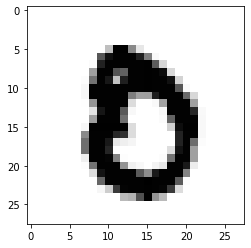

In [30]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(num_epochs):
    avg_cost = 0

    for i in range(num_iterations):
      batch_xs,batch_ys = mnist.train.next_batch(batch_size)
      _, cost_val = sess.run([train,cost], feed_dict = {x:batch_xs, y:batch_ys})
      avg_cost += cost_val/ num_iterations
    print('epoch:{:04d}, cost:{:.9f}'.format(epoch+1,avg_cost))
  print('learning finished')
  print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels}
        ),
    )
  r = random.randint(0, mnist.test.num_examples - 1)
  print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
  print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={x: mnist.test.images[r : r + 1]}),
      )

  plt.imshow(
      mnist.test.images[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
      )
  plt.show()